Epoch 1/100
227/227 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 2/100
227/227 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 3/100
227/227 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 4/100
227/227 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 5/100
227/227 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 6/100
227/227 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 7/100
227/227 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 8/100
227/227 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 9/100
227/227 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 10/100
227/227 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 11/100
227/227 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 12/100
227/227 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 13/100


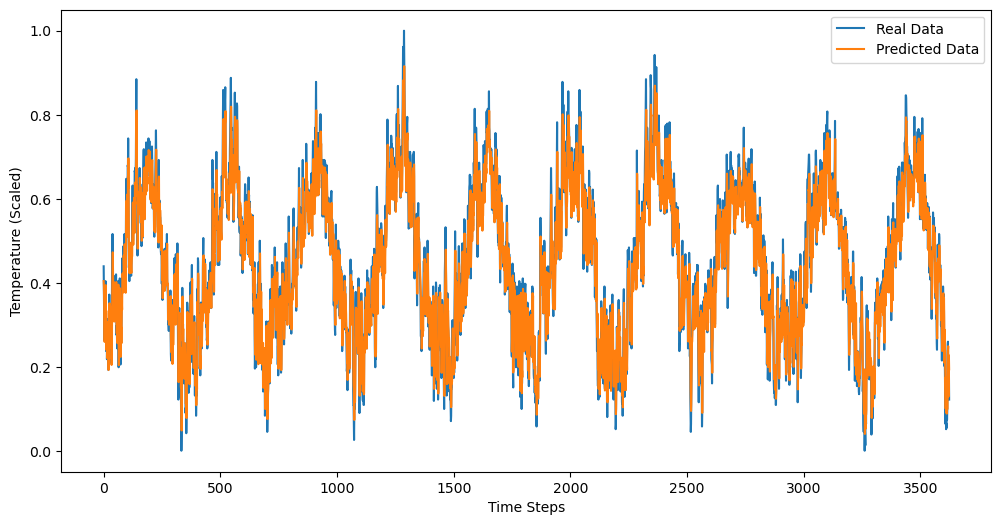

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
data = pd.read_csv('weather_prediction_dataset.csv')

# 'HEATHROW_temp_mean' 열을 예측한다고 가정
temperature_data = data['HEATHROW_temp_mean'].values.reshape(-1, 1)

# 2. 데이터 정규화 (0과 1 사이로 값 변환)
scaler = MinMaxScaler(feature_range=(0, 1))
temp_data = scaler.fit_transform(temperature_data)

# 3. 시퀀스 데이터 생성 함수
def make_sample(data, seq_length):
    train, target = [], []
    for i in range(len(data) - seq_length):
        train.append(data[i:i + seq_length])
        target.append(data[i + seq_length])
    return np.array(train), np.array(target)

seq_length = 30  # 과거 30일의 데이터를 사용하여 다음 값을 예측
x, y = make_sample(temp_data, seq_length)

# 4. RNN 모델 구성
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(seq_length, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# 5. 모델 학습
history = model.fit(x, y, epochs=100, batch_size=16, verbose=1)

# 6. 모델 예측
predicted = model.predict(x, batch_size=16)

# 7. 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(y, label='Real Data')
plt.plot(predicted, label='Predicted Data')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (Scaled)')
plt.legend()
plt.show()